In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64': 
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.vector_gen import *
from Utils.w2b_encoding_lw import *
from Models.RNN_paper_prototype import *
from Utils.metrics_summary import *

2024-04-15 15:05:46.205772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 15:05:46.205802: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 15:05:46.206721: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 15:05:46.211902: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 15:05:46.868313: W tensorflow/compiler/tf2

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-04-15 15:05:47.502458: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 15:05:47.537871: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 15:05:47.538071: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
original_df = dataframe_init(gpu_token)[0]
vectors = vec_split(original_df)
vectors = encoder(vectors)
tensors = tensor_gen(vectors)

/home/ucdasec/Faulthunter-RNN-approach/Utils/w2b_encoding_lw.py:78: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  vectors[vector]['Encoded Lines'][row[0]] = [eval(i) for i in encodedline]#tuple(encodedline)
/home/ucdasec/Faulthunter-RNN-appr

In [3]:
vectors[0]

,File,Line Number,Original Line Number,Lines,Encoded Lines,Label
0,AX3_Firmware main.c,203,269,<start> #endif <end>,"[1, 1]","[0, 1]"
1,tc-iot-sdk-embedded main.c,4480,110,<start> static void esp_wifi_initialise ( void...,"[1, 1]","[0, 1]"
2,MicroBros-SmartHome main.c,3061,34,<start> Temp_initialize ( ) ; <end>,"[1, 1]","[0, 1]"
3,Hardware-Bitcoin-Wallet xex.c,1284,472,"<start> fscanf ( f , ""%02x"" , &value ) ; <...","[1, 1]","[0, 1]"
4,sef-project main.c,3507,51,"<start> asm ( ""NOP"" ) ; <end>","[1, 1]","[0, 1]"
...,...,...,...,...,...,...
2847,SmartLock_HardwareDriver main.c,4002,24,<start> u8 modeFlag = 0 ; <end>,"[1, 1]","[0, 1]"
2848,iotkit-embedded iotx_http_api.c,1996,504,<start> } <end>,"[1, 1]","[0, 1]"
2849,MicroBros-SmartHome main.c,3060,33,<start> PIR_initialize ( ) ; <end>,"[1, 1]","[0, 1]"
2850,Hardware-Bitcoin-Wallet xex.c,1336,528,<start> } <end>,"[1, 1]","[0, 1]"


In [4]:
# import keras
# from keras import layers
def model_ver_10(input_shape):
    model = keras.models.Sequential([
    layers.Dense(4, input_shape=(2,), activation='relu'),  # Hidden layer with 4 units
    layers.Dense(2, activation='softmax')  # Output layer with 2 units (binary classification)
])
    return model
    


In [5]:
model = model_ver_10(tensors[0][0].shape[0])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
for i in vectors[0].loc:
    if i['Lines'].lstrip('<start>').lstrip().startswith('if'):
        print(i)

File                                      iotkit-embedded iotx_http_api.c
Line Number                                                          1862
Original Line Number                                                  338
Lines                   <start>     if  ( NULL ==  ( iotx_http_context...
Encoded Lines                                                      [0, 0]
Label                                                              [1, 0]
Name: 17, dtype: object
File                                       Firmament-Autopilot i2c_core.c
Line Number                                                           838
Original Line Number                                                   96
Lines                   <start>     if  ( bus->ops->master_xfer )  { <...
Encoded Lines                                                      [0, 0]
Label                                                              [1, 0]
Name: 19, dtype: object
File                                     tc-iot-sdk-embedded mai

KeyError: 2852

In [7]:
history = model.fit(tensors[0], tensors[3], epochs=50, validation_data=(tensors[1],tensors[4]))
# y_pred = model.predict(tensors[2])

Epoch 1/50


2024-04-15 15:06:06.330557: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:185] failed to create cublas handle: the library was not initialized
2024-04-15 15:06:06.330583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:188] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2024-04-15 15:06:06.330614: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at matmul_op_impl.h:817 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError: Graph execution error:

Detected at node sequential/dense/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_5584/3252410193.py", line 1, in <module>

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py", line 241, in call

Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[{{node sequential/dense/MatMul}}]] [Op:__inference_train_function_748]

In [71]:
y_pred

array([[0.23148304, 0.76851696],
       [0.23148304, 0.76851696],
       [0.23148304, 0.76851696],
       ...,
       [0.23148304, 0.76851696],
       [0.23148304, 0.76851696],
       [0.23148304, 0.76851696]], dtype=float32)

In [7]:
classify = lambda x : int(x[0]<x[1])
classified_outputs = list(map(classify, y_pred))
classified_labels = list(map(classify, tensors[5]))

In [8]:
score_summary(classified_labels, classified_outputs, 0)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 0)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))
print('#########################################\n')
score_summary(classified_labels, classified_outputs, 1)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 1)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))

For secure:
f1 score:  0.0
precision score:  0
recall score:  0.0

true_positives: 0
true_negetives: 757
false_positives: 0
false_negetives: 59

#########################################

For insecure:
f1 score:  0.9624920534011443
precision score:  0.9276960784313726
recall score:  0

true_positives: 757
true_negetives: 0
false_positives: 59
false_negetives: 0



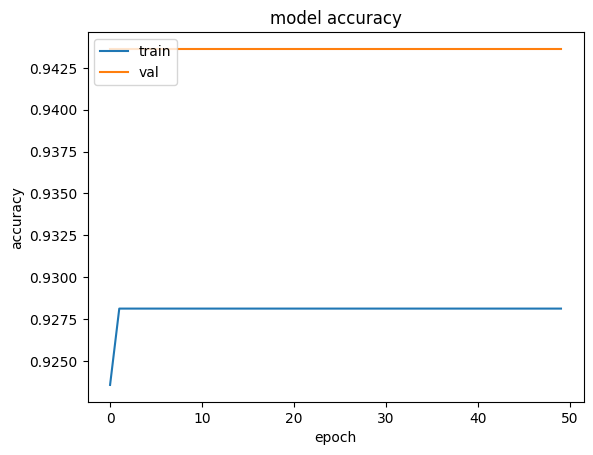

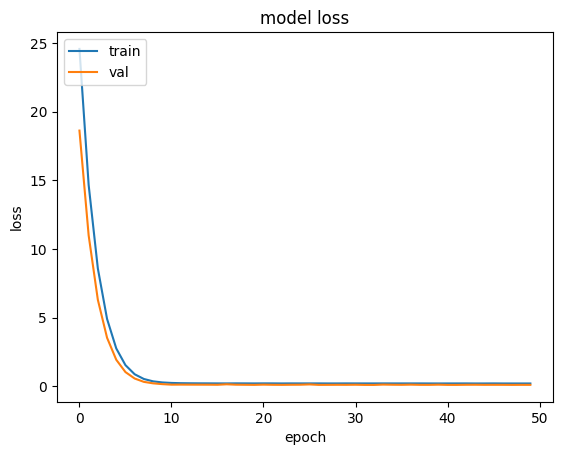

In [10]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!nvidia-smi

Mon Apr 15 14:09:20 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 28%   35C    P5     9W / 151W |   7970MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
!sudo reboot

[sudo] password for ucdasec: 


In [6]:
!git pull

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 6 (delta 4), reused 6 (delta 4), pack-reused 0
Unpacking objects: 100% (6/6), 55.12 KiB | 1.84 MiB/s, done.
From https://github.com/sakshmenon/Faulthunter-RNN-approach
   fd37b50..cec4bde  dev        -> origin/dev
Updating fd37b50..cec4bde
Fast-forward
 Scripts/tester.ipynb     | 13175 ++++++++++++++++++++++++++++++++++++++++++++-
 Utils/w2b_encoding_lw.py |     2 +-
 2 files changed, 13160 insertions(+), 17 deletions(-)
